# <font color=black size=6>SharkNinja Robot Amazon 1000 Reviews - NLP</font> 

<font color=black size=4>@CicilyWu</font> 

![Image of Yaktocat](https://prnewswire2-a.akamaihd.net/p/1893751/sp/189375100/thumbnail/entry_id/1_e30wylfu/def_height/497/def_width/950/version/100011/type/1)

<font color=black size=3>This NLP project contains 6 parts:   
1. **Problem Statement**: State the problems and the objectives of my research. 
2. **Data Description**: An introduction of my dataset.  
3. **Exploratory Data Analysis (EDA)**: Data cleaning, pre-processing and some basic visualizations.  
4. **Topic Modeling (LDA, TFIDF)**: Check the frequencies of each word and set different topic numbers to explore how it works.Topic themes guesses based on top words.Word Cloud Visualizaiton. 
5. **Machine Learning Model Prediction**: Only use Logistic Regression and Decision Tree models to perform a quick prediciton on customers'attitudes toward product. I want to focus on NLP in this project so check my other projects if you want to see more ML models usage.  
6. **Automatically Summarize Reviews**: A quick way to read long reviews.  </font>  

# 1. Problem Statement

<font color=black size=3>This is a Natural language processing (NLP) project to analyze 1000 comments made on Amazon about SharkNinja's Shark IQ Robot.I worked on this project right before I joined the company as a full-time exployee as I am interested to learn more about SharkNinja's product. A short explanation about Shark IQ Robt is as below.</font>    

<font color=gray size=3>The Shark IQ Robot Vacuum combines convenience with intelligence and performance. After each cleaning session, your robot vacuum automatically empties the dust bin into the bag less base, which holds dirt and debris from up to 30 cleaning sessions. With IQ NAV, your robot now maps your whole home, allowing you to select which rooms to clean with Shark Clean App or Alexa. The Shark IQ Robot cleans row by row to assure total floor cleaning. On low battery, your robot recharges and resumes where it left off. And with Shark powerful suction and a self-cleaning brush roll, you get amazing cleaning performance.https://www.amazon.com/Shark-R1001AE-Self-Empty-Connected-Capacity/dp/B07S864GPW</font>    

<font color=black size=3>Customers' reviews are always valuable for company to learn customers' habits and improve their products. With only limited numbers from ratings, votes and comments, it is eager to dig more useful information from review texts. Let's start exploration!<font color=black size=3>  

# 2. Data Description

<font color=black size=3>I used "Instant Data Scraper" to scrape the most recent reviews on Amazon. This is a useful tool to scape the data and text online and we just need to locate the "Next" button.  
There are lots of useless columns after scraping and the names are messy. After looking into the data I only kept certain columns those might me helpful.  

The data contains the following fields:   
1. CustomerName: Self-explanatory.  
2. Rating: Ratings on Amazon with the full mark 5.  
3. ReviewTitle: Self-explanatory.  
4. ReviewTime: The time the customers made the review.  
5. Review: Review body.  
6. HelpfulNumber: Number of votes under the review.  
7. ReviewCommentNumber: Number of comments under the review.</font>  


# 3. Exploratory Data Analysis (EDA)

<font color=purple size=4>Import the libraries first.</font>

In [380]:
import random
random.seed(17)
import pandas as pd
import numpy as np
import datetime
from PIL import *
import PIL.Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
import nltk
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)
import spacy
import gensim
from gensim import corpora
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
%matplotlib inline
import inflect
import itertools
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\吴晓彤\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\吴晓彤\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\吴晓彤\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\吴晓彤\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<font color=purple size=4>Read the data and keep useful columns.</font>

In [402]:
review_all=pd.read_csv('D:\shark_work\shark1000comments.csv')
review_all=review_all.drop(['a-profile href', 'a-profile-avatar','a-link-normal href', 'a-link-normal href 2','a-size-base href 2', 'a-link-normal href 3',
                           'a-link-normal href 4', 'a-lazy-loaded src', 'a-declarative','a-size-base 6','a-size-base 7','a-size-base 5'], axis=1)
#Two ways to change column name:
#df.columns = ['A','B']
#df.rename(columns={'a':'A'})
review_all.columns=['CustomerName','Rating','ReviewTitle','ReviewTime','Verified','Review','HelpfulNumber','ReviewCommentNumber']
review_all.head()

<>:1: DeprecationWarning: invalid escape sequence \s
<>:1: DeprecationWarning: invalid escape sequence \s
<>:1: DeprecationWarning: invalid escape sequence \s
<ipython-input-402-9f082a4b7549>:1: DeprecationWarning: invalid escape sequence \s
  review_all=pd.read_csv('D:\shark_work\shark1000comments.csv')


CustomerName  \
0   B. Mindful   
1  Scott Flack   
2     RDouglas   
3       Wesley   
4      Bill S.   

               Rating  \
0  1.0 out of 5 stars   
1  3.0 out of 5 stars   
2  1.0 out of 5 stars   
3  3.0 out of 5 stars   
4  1.0 out of 5 stars   

                       ReviewTitle  \
0  This is a poor man's Roomba i7+   
1      The Shark IQ is dim witted.   
2      So far so bad but improving   
3                  Too aggressive.   
4                  Parting Company   

                                          ReviewTime  \
0  Reviewed in the United States on October 10, 2019   
1  Reviewed in the United States on October 16, 2019   
2  Reviewed in the United States on October 18, 2019   
3  Reviewed in the United States on October 21, 2019   
4  Reviewed in the United States on October 22, 2019   

            Verified  \
0  Verified Purchase   
1  Verified Purchase   
2  Verified Purchase   
3  Verified Purchase   
4  Verified Purchase   

                                                                                                                                                                                                    Review  \
0  I have a Roomba i7+ and bought the Shark IQ R101 for my mother's house hoping that it would perform as good or close to the Roomba i7+. At half the price of the Roomba, I thought it was worth tryi...   
1  I had a cheap random motion vacuum robot that worked pretty well.  I decided to upgrade to this Shark unit for the added mapping functionality and auto empty.  In some ways the cheap off brand uni...   
2  Final update:I made the mistake of saying that it doesn't get stuck in my last review and sure enough the same day it started getting stuck every run.  it gets to the stairs or the transition betw...   
3  I have a roomba 980 that has been working well for my family for about 1.5 years.  We wanted a second robot vacuum and decided to give this Shark IQ 101AE  a shot given the price point and feature...   
4  I purchased the Shark IQ to replace a NEATO that finally, after many years and cycles of service, went to that robot vacuum cleaner home in the sky.  The Shark had some big shoes to fill, but I wa...   

                     HelpfulNumber  \
0  1,031 people found this helpful   
1    288 people found this helpful   
2    282 people found this helpful   
3    229 people found this helpful   
4    180 people found this helpful   

   ReviewCommentNumber  
0                   28  
1                    7  
2                    6  
3                    3  
4                    3

In [403]:
Ratings=review_all['Rating'].str.rsplit('.', expand=True, n=1)
del Ratings[1]
review_all = pd.concat([review_all,Ratings], axis=1, join_axes=[review_all.index])
review_all.columns=['CustomerName','Rating','ReviewTitle','ReviewTime','Verified','Review','HelpfulNumber','ReviewCommentNumber','Ratings']
review_all.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  This is separate from the ipykernel package so we can avoid doing imports until


CustomerName  \
0   B. Mindful   
1  Scott Flack   
2     RDouglas   
3       Wesley   
4      Bill S.   

               Rating  \
0  1.0 out of 5 stars   
1  3.0 out of 5 stars   
2  1.0 out of 5 stars   
3  3.0 out of 5 stars   
4  1.0 out of 5 stars   

                       ReviewTitle  \
0  This is a poor man's Roomba i7+   
1      The Shark IQ is dim witted.   
2      So far so bad but improving   
3                  Too aggressive.   
4                  Parting Company   

                                          ReviewTime  \
0  Reviewed in the United States on October 10, 2019   
1  Reviewed in the United States on October 16, 2019   
2  Reviewed in the United States on October 18, 2019   
3  Reviewed in the United States on October 21, 2019   
4  Reviewed in the United States on October 22, 2019   

            Verified  \
0  Verified Purchase   
1  Verified Purchase   
2  Verified Purchase   
3  Verified Purchase   
4  Verified Purchase   

                                                                                                                                                                                                    Review  \
0  I have a Roomba i7+ and bought the Shark IQ R101 for my mother's house hoping that it would perform as good or close to the Roomba i7+. At half the price of the Roomba, I thought it was worth tryi...   
1  I had a cheap random motion vacuum robot that worked pretty well.  I decided to upgrade to this Shark unit for the added mapping functionality and auto empty.  In some ways the cheap off brand uni...   
2  Final update:I made the mistake of saying that it doesn't get stuck in my last review and sure enough the same day it started getting stuck every run.  it gets to the stairs or the transition betw...   
3  I have a roomba 980 that has been working well for my family for about 1.5 years.  We wanted a second robot vacuum and decided to give this Shark IQ 101AE  a shot given the price point and feature...   
4  I purchased the Shark IQ to replace a NEATO that finally, after many years and cycles of service, went to that robot vacuum cleaner home in the sky.  The Shark had some big shoes to fill, but I wa...   

                     HelpfulNumber  \
0  1,031 people found this helpful   
1    288 people found this helpful   
2    282 people found this helpful   
3    229 people found this helpful   
4    180 people found this helpful   

   ReviewCommentNumber  \
0                   28   
1                    7   
2                    6   
3                    3   
4                    3   

  Ratings  
0       1  
1       3  
2       1  
3       3  
4       1

In [404]:
review_all['HelpfulNumber'].replace('Report abuse',0,inplace=True)
review_all['HelpfulNumber'].replace('One person found this helpful',1,inplace=True)

In [405]:
Time=review_all['ReviewTime'].str.rsplit(' ', expand=True, n=3)
#Time['Date'] = Time[1]+' '+Time[2]+' '+Time[3]
Time[1].replace('January',"01",inplace=True)
Time[1].replace('February',"02",inplace=True)
Time[1].replace('March',"03",inplace=True)
Time[1].replace('April',"04",inplace=True)
Time[1].replace('May',"05",inplace=True)
Time[1].replace('June',"06",inplace=True)
Time[1].replace('July',"07",inplace=True)
Time[1].replace('August',"08",inplace=True)
Time[1].replace('September',"09",inplace=True)
Time[1].replace('October',10,inplace=True)
Time[1].replace('November',11,inplace=True)
Time[1].replace('December',12,inplace=True)
Time[2] = Time[2] .map(lambda x: str(x)[:-1])#Delete the last str。Delete the first two str：data['result'] = data['result'].map(lambda x: str(x)[2:])

In [406]:
pd.set_option('display.width', 20, 'display.max_rows', 1500)
TimeDays=Time[2]

In [407]:
TimeDays=Time[2]
for i in range(0,Time.shape[0]):
    if len(Time[2][i])>1:
        TimeDays[i]=Time[2][i]
    else:
        TimeDays[i]="0"+Time[2][i]
    i += 1
    
Time['TimeDays']=TimeDays

In [408]:
Time[1]= Time[1].apply(str)
Time[2]= Time[2].apply(str)
Time[3]= Time[3].apply(str)
Time['TimeDays']= Time['TimeDays'].apply(str)

In [409]:
Time['Date']=Time[3]+'-'+Time[1]+'-'+Time['TimeDays']
Time.head()

0  \
0  Reviewed in the United States on   
1  Reviewed in the United States on   
2  Reviewed in the United States on   
3  Reviewed in the United States on   
4  Reviewed in the United States on   

    1   2     3  \
0  10  10  2019   
1  10  16  2019   
2  10  18  2019   
3  10  21  2019   
4  10  22  2019   

  TimeDays  \
0       10   
1       16   
2       18   
3       21   
4       22   

         Date  
0  2019-10-10  
1  2019-10-16  
2  2019-10-18  
3  2019-10-21  
4  2019-10-22

In [410]:
Time['Date'] = pd.to_datetime(Time['Date'])
del Time[0]
Time.columns=['ReviewMonth','ReviewDate','ReviewYear','TimeDays','Date']

In [411]:
review_all = pd.concat([review_all,Time], axis=1, join_axes=[review_all.index])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


In [412]:
review_all.drop(['Rating','ReviewTime','ReviewDate','TimeDays'], axis=1, inplace=True)

In [413]:
#review_all['Ratings'].to_numeric(review_all, errors='ignore')
review_all['Ratings'] =review_all['Ratings'].apply(pd.to_numeric)

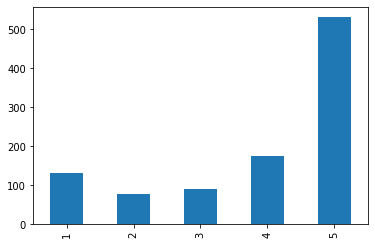

In [414]:
review_all['Ratings'].value_counts().sort_index().plot(kind='bar')

<font color=purple size=4>More than 500 reviews got 5 stars! Also almost 200 reviews got 4 stars. Excellent job Shark Robot!</font>

In [417]:
review_all['HelpfulNumber'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'') #only keep numbers
review_all['HelpfulNumber'].replace('',"0",inplace=True)
review_all['HelpfulNumber'] = review_all['HelpfulNumber'].astype('int')
votes=review_all.groupby('Ratings').HelpfulNumber.sum()
votes=votes.to_frame()

In [466]:
review_all['ReviewCommentNumber'].replace('',"0",inplace=True)
review_all['ReviewCommentNumber'] = review_all['ReviewCommentNumber'].astype('int')
comments_num=review_all.groupby('Ratings').ReviewCommentNumber.sum()
comments_num=comments_num.to_frame()

Text(0.5, 1.0, 'Votes Count group by Ratings')

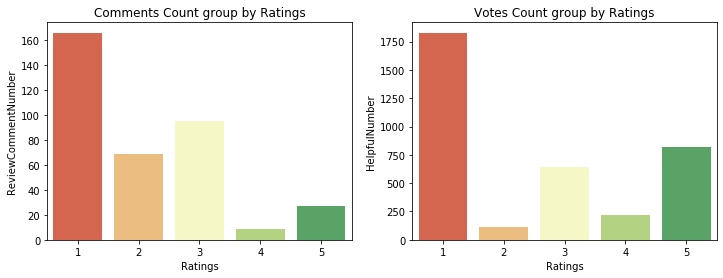

In [471]:
axes=plt.figure(figsize=(12,4))

plt.subplot(121)
ax1=sns.barplot(x=comments_num.index, y ='ReviewCommentNumber',data=comments_num,palette="RdYlGn")#axa 小图在大图中的位置
ax1.set_title('Comments Count group by Ratings')

plt.subplot(122)
ax2=sns.barplot(x=votes.index, y ='HelpfulNumber',data=votes,palette="RdYlGn")#axa 小图在大图中的位置
ax2.set_title('Votes Count group by Ratings')

<font color=purple size=4>Above two plots are showing the total number of comments and votes received by each Ratings. 1-star reviews received most votes and comments, which means people are more focused on "negative reviews" when doing the research. Reviews with highest votes are most likely to be shown on the top based on Amazon's algorithm (from my observation).  
One of the best marketing strategies is to gain more votes on 5-star reviews so that customers can see more "positive reviews" when they make buying decisions.  
Also, higher comments under reviews means the 1-start reviews received more attention. As many customers may glance over comments under 1-star reviews, the customer service from SN's better to present appropriate solutions to help customers fix the issues or provide convincing explanation in the comments. </font>

<font color=purple size=4>Now start the word processing by deleting the stop words,lowercasing all words and tokenizing the reviews.  
Also, we count the original number counts and words count after cleaning.</font>

In [20]:
# words to be removed from vocabulary
blockwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at','since','paid','don','doesn','close',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'doing', "don't", 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
 "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'like',
 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 'also','can','could','should',
 "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'not','bit','much',
 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where','within','quite','really','just','together',
 "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 'hole','furniture','put',
 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', "s'yourself'", 'yourselves', 'drawer','sure',
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd','nightstand','nightstands','night',
 '4th', '5th', '6th', '7th', '8th', '9th', '10th']

In [21]:
review_all['Review']= review_all['Review'].apply(str)

In [22]:
stop_words = set(stopwords.words('english'))                      # set of all stop words
lem=WordNetLemmatizer()
p=inflect.engine()

def process(comment):
  sent = comment.lower()                                          # lower case all words 
  words = nltk.word_tokenize(sent)
  words =  [word for word in words if not word in blockwords]     # remove words present in blockwords
  words = [word for word in words if not word.isdigit()]          # remove digit characters
  words = [word for word in words if len(word) > 3]               # remove words with length less than 3
  words = [word for word in words if word.isalpha()]              # remove non alphabetic words
  words = [lem.lemmatize(word) for word in words]                 # lemmatize words to root word
  sent = ' '.join(words)
  sent = re.sub(r'\(', '', sent)
  sent = re.sub(r'\)', '', sent)
  sent = re.sub(r"'", '', sent)
  return sent

def num_words(sent):                                              # returns number of words in the sentence
  word_tok=nltk.word_tokenize(sent)
  return len(word_tok)

review_all['Cleaned_Comment']=review_all['Review'].apply(process)
review_all['Unclean_len']=review_all['Review'].apply(num_words)                     # word length of uncleaned comments
review_all['Clean_len']=review_all.Cleaned_Comment.apply(num_words)               # word length of cleaned comments
review_all['percentage reduction']=(review_all['Unclean_len']-review_all['Clean_len'])/review_all['Unclean_len']*100 # percentage of reduction

In [23]:
review_all

CustomerName  \
0                                                B. Mindful   
1                                               Scott Flack   
2                                                  RDouglas   
3                                                    Wesley   
4                                                   Bill S.   
5                                                James Chen   
6                                                      Rick   
7                                           Amazon Customer   
8                                           Amazon Customer   
9                                            Jason Ransdell   
10                                                     Mick   
11                                            Granny Franny   
12                                                  Lillian   
13                                                   John F   
14                                                 Jeremy M   
15                                                      SOB   
16                                                     jack   
17                                               Anderson’s   
18                                            coleen ferrin   
19                                            Joe Bernicker   
20                                            Jose Oliveira   
21                                          Amazon Customer   
22                                                 UCF10fan   
23                                              Norma Scott   
24                                                 Red Shay   
25                                          yunon zavulonov   
26                                          Amanda Victoria   
27                                                   Ryan_L   
28                                                  Bill Xu   
29                                         Charles K. Walls   
30                                                    kavin   
31                                                   Chip W   
32                                                       JK   
33                                             Brad Goodall   
34                                           Shareef Yousef   
35                                          Amazon Customer   
36                                          Abraham Cornejo   
37                                               jeffery d.   
38                                                    Shone   
39                                                 Cathy M.   
40                                                  Paulnet   
41                                             AvatarJennie   
42                                                    Wendy   
43                                            PB and J Time   
44                                               Gavin Hill   
45                                               Jacqueline   
46                                                L&SHodges   
47                                            Misty shiplet   
48                                          Amazon Customer   
49                                                      Wes   
50                                                 B. Brown   
51                                          Amazon Customer   
52                                          Amazon Customer   
53                                                   Joe T.   
54                                                 SChriste   
55                                                  L-Train   
56                                           VaderIncarnate   
57                                                   Sandra   
58                                                   Pete C   
59                                                    James   
60                                                     D. L   
61                                                    Jason   
62                                               levi meyer   
63             

In [24]:
five_rated=review_all[review_all['Ratings']==5] #filter the dataframe by rating=5
text= " ".join(five_rated['Cleaned_Comment'])
text

'cleaning robot doe improve life quality good experience using week conclude good feature following efficientit take run robot complete floor locate robot take around minute cleanup space around square foot doe sound efficient floor sofa table chair scattered around composed different landscape carpet wooden floor guess understand struggling kind robot make complex environment pretty amazing performs accuratethe robot draw pretty accurate opinion despite space squeeze example shelf box come run honestly space make easy useit take around minute setup unbox robot account registration pairing robot account simple couple click shark provides easy schedule run resume robot stuck want point condition robot stuck encounter robot stuck fluffy carpet blame robot condition even tackled carpet couple time happens immediately send notification describing happened possible cause detailed instruction resolve problem method provides always work resolve problem right agree good user experience quick r

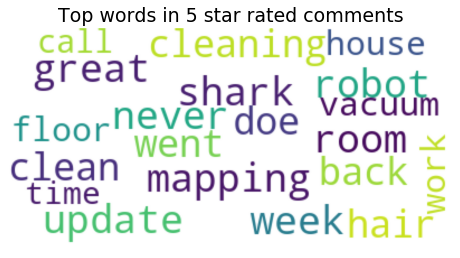

In [372]:
# Display the generated image:
wordcloud = WordCloud(max_font_size=35, max_words=40, background_color="white",collocations=False).generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation="gaussian")
plt.title('Top words in 5 star rated comments',size=19)
plt.axis("off")
plt.show()

<font color=purple size=4>Most popular words showing in 5 star reviews are showing in the word cloud.</font><font color=red size=4> We can see that mapping function,cleaning hair well and ability to work on a schedule mean a lot to customers!</font>

# 4. Topic Modeling (LDA, TFIDF)

In [26]:
comments=[]
for i in range(review_all.shape[0]):
  comments.append(review_all['Cleaned_Comment'].apply(nltk.word_tokenize).values[i])  # tokenize all the words in all the comments

In [27]:
comments

[['roomba',
  'bought',
  'shark',
  'mother',
  'house',
  'hoping',
  'perform',
  'good',
  'roomba',
  'half',
  'price',
  'roomba',
  'thought',
  'worth',
  'trying',
  'well',
  'shark',
  'basically',
  'poor',
  'roomba',
  'look',
  'even',
  'make',
  'little',
  'jingle',
  'roomba',
  'self',
  'disposing',
  'empty',
  'term',
  'performance',
  'surprised',
  'loud',
  'shark',
  'sound',
  'helicopter',
  'lap',
  'around',
  'house',
  'uploaded',
  'video',
  'pretty',
  'obnoxious',
  'second',
  'machine',
  'take',
  'long',
  'time',
  'return',
  'dock',
  'return',
  'time',
  'running',
  'make',
  'back',
  'dock',
  'time',
  'time',
  'around',
  'hunting',
  'reason',
  'stop',
  'random',
  'place',
  'house',
  'error',
  'message',
  'third',
  'time',
  'still',
  'enough',
  'house',
  'hoping',
  'regular',
  'schedule',
  'clean',
  'room',
  'room',
  'time',
  'week',
  'time',
  'running',
  'gave',
  'place',
  'fourth',
  'annoying',
  'design'

In [28]:
num_topics = 3 # number of topics

dictionary = corpora.Dictionary(comments) # create a dictionary of all words
doc_term_matrix = [dictionary.doc2bow(rev) for rev in comments]

LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, random_state=100,chunksize=1000, passes=50)

In [29]:
lda_model.print_topics() # 3 topics have been generated along with the importance of each word in the topic

[(0,
  '0.030*"vacuum" + 0.025*"shark" + 0.020*"house" + 0.018*"hair" + 0.018*"week" + 0.015*"never" + 0.015*"floor" + 0.015*"cleaning" + 0.011*"great" + 0.010*"went"'),
 (1,
  '0.035*"time" + 0.032*"room" + 0.023*"clean" + 0.019*"doe" + 0.019*"vacuum" + 0.016*"back" + 0.012*"call" + 0.012*"update" + 0.012*"work" + 0.012*"mapping"'),
 (2,
  '0.017*"vacuum" + 0.014*"clean" + 0.014*"robot" + 0.012*"shark" + 0.012*"doe" + 0.011*"time" + 0.010*"floor" + 0.009*"house" + 0.009*"great" + 0.009*"work"')]

<font color=purple size=4>I intend to separate the texts into 3 topics at first. The 3 groups and corresponding critical words as well as the determination probability is shown. I don't think we can get enough information from these 3 groups, which means 3 topics may not enough. I'll explore setting more groups later. But from this result, we can basically guess in this situation, the first group focuses on how great the robot can clean the house floor and never got stuckso far; the second group focuses on that the robots can follow a schedule to clean the house and the third group is basically the same as the first one.   </font>

In [30]:
topic_words=[] 
for i in range(num_topics):
  for j in range(25):
    try:
        topic_words.append(lda_model.print_topic(topicno=i).split('+')[j].split('"')[1]) # get all topic words
    except:
      pass

In [31]:
topic_words

['vacuum',
 'shark',
 'house',
 'hair',
 'week',
 'never',
 'floor',
 'cleaning',
 'great',
 'went',
 'time',
 'room',
 'clean',
 'doe',
 'vacuum',
 'back',
 'call',
 'update',
 'work',
 'mapping',
 'vacuum',
 'clean',
 'robot',
 'shark',
 'doe',
 'time',
 'floor',
 'house',
 'great',
 'work']

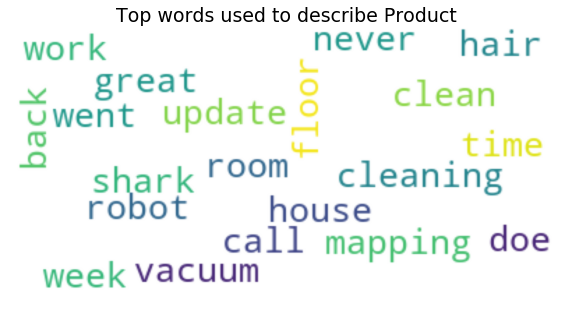

In [32]:
topic_words=list(set(topic_words)) #set() got a no-sequence no-repeat set
text= " ".join(topic_words)
# Display the generated image:
wordcloud = WordCloud(max_font_size=25, max_words=len(topic_words), background_color="white",collocations=False).generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="gaussian")
plt.title('Top words used to describe Product',size=19)
plt.axis("off")
plt.show()

In [267]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

E:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x  \
topic             
2     -0.046348   
0     -0.160401   
1      0.206749   

              y  \
topic             
2     -0.164718   
0      0.113549   
1      0.051169   

       topics  \
topic           
2           1   
0           2   
1           3   

       cluster  \
topic            
2            1   
0            1   
1            1   

            Freq  
topic             
2      85.532425  
0       8.423129  
1       6.044442  , topic_info=     Category  \
141   Default   
88    Default   
72    Default   
9     Default   
78    Default   
111   Default   
42    Default   
37    Default   
162   Default   
4     Default   
187   Default   
144   Default   
95    Default   
130   Default   
123   Default   
193   Default   
381   Default   
28    Default   
21    Default   
80    Default   
64    Default   
96    Default   
36    Default   
293   Default   
113   Default   
73    Default   
234   Default   
51    Default   
262   Default   
138   Default   
533    Topic1   
65     Topic1   
137    Topic1   
46     Topic1   
361    Topic1   
175    Topic1   
7      Topic1   
156    Topic1   
62     Topic1   
133    Topic1   
423    Topic1   
47     Topic1   
497    Topic1   
309    Topic1   
290    Topic1   
107    Topic1   
900    Topic1   
191    Topic1   
327    Topic1   
421    Topic1   
745    Topic1   
135    Topic1   
243    Topic1   
125    Topic1   
604    Topic1   
60     Topic1   
500    Topic1   
639    Topic1   
374    Topic1   
318    Topic1   
24     Topic1   
130    Topic1   
120    Topic1   
9      Topic1   
77     Topic1   
85     Topic1   
103    Topic1   
379    Topic1   
118    Topic1   
193    Topic1   
36     Topic1   
153    Topic1   
141    Topic1   
144    Topic1   
111    Topic1   
187    Topic1   
251    Topic1   
183    Topic1   
78     Topic1   
162    Topic1   
96     Topic1   
88     Topic1   
37     Topic1   
42     Topic1   
72     Topic1   
113    Topic1   
4      Topic1   
428    Topic1   
2      Topic1   
2587   Topic2   
414    Topic2   
3753   Topic2   
1025   Topic2   
711    Topic2   
856    Topic2   
733    Topic2   
2477   Topic2   
1274   Topic2   
1024   Topic2   
2415   Topic2   
1217   Topic2   
3160   Topic2   
2516   Topic2   
3757   Topic2   
3756   Topic2   
3755   Topic2   
3754   Topic2   
3752   Topic2   
3763   Topic2   
3765   Topic2   
3773   Topic2   
3772   Topic2   
3764   Topic2   
1930   Topic2   
1954   Topic2   
1481   Topic2   
2014   Topic2   
2290   Topic2   
121    Topic2   
2585   Topic2   
1180   Topic2   
2295   Topic2   
953    Topic2   
2627   Topic2   
1035   Topic2   
814    Topic2   
1807   Topic2   
2029   Topic2   
529    Topic2   
583    Topic2   
680    Topic2   
157    Topic2   
2056   Topic2   
3307   Topic2   
1628   Topic2   
1265   Topic2   
140    Topic2   
1239   Topic2   
835    Topic2   
381    Topic2   
974    Topic2   
343    Topic2   
95     Topic2   
571    Topic2   
952    Topic2   
70     Topic2   
78     Topic2   
141    Topic2   
696    Topic2   
42     Topic2   
64     Topic2   
37     Topic2   
75     Topic2   
221    Topic2   
162    Topic2   
187    Topic2   
192    Topic2   
1096   Topic2   
91     Topic2   
769    Topic2   
4      Topic2   
131    Topic2   
193    Topic2   
80     Topic2   
73     Topic2   
51     Topic2   
111    Topic2   
88     Topic2   
113    Topic2   
28     Topic2   
123    Topic2   
36     Topic2   
144    Topic2   
130    Topic2   
561    Topic2   
340    Topic3   
410    Topic3   
3256   Topic3   
1017   Topic3   
398    Topic3   
1462   Topic3   
1724   Topic3   
3540   Topic3   
2433   Topic3   
3296   Topic3   
2307   Topic3   
3766   Topic3   
3767   Topic3   
3768   Topic3   
3769   Topic3   
3770   Topic3   
3771   Topic3   
3762   Topic3   
3761   Topic3   
3760   Topic3   
3759   Topic3   
3758   Topic3   
3774   Topic3   
982    Topic3   
3231   Topic3   
2125   Topic3   
1822   Topic3   
3541   Topic3   
1459   Topic3   
3371   T

<font color=purple size=4>This step is to devide them based on their attitude towards products to perform sentiment analysis later. I set rating 1-3 as Negative, rating 4 as Neutral and rating 5 as Positive. This may sound supr strict at first impression but from what I know, SharkNinja's been keeping thier product review star as 4.3+ in total, which shows this critiria is not hard to meet for SharkNinja Robot Team.  </font>

In [60]:
review_all['attitude']=review_all['Ratings']
review_all['attitude'].replace(1,'Negative',inplace=True)
review_all['attitude'].replace(2,'Negative',inplace=True)
review_all['attitude'].replace(3,'Negative',inplace=True)
review_all['attitude'].replace(4,'Neutral',inplace=True)
review_all['attitude'].replace(5,'Positive',inplace=True)

review_all.head()

CustomerName  \
0   B. Mindful   
1  Scott Flack   
2     RDouglas   
3       Wesley   
4      Bill S.   

                       ReviewTitle  \
0  This is a poor man's Roomba i7+   
1      The Shark IQ is dim witted.   
2      So far so bad but improving   
3                  Too aggressive.   
4                  Parting Company   

            Verified  \
0  Verified Purchase   
1  Verified Purchase   
2  Verified Purchase   
3  Verified Purchase   
4  Verified Purchase   

                                                                                                                                                                                                    Review  \
0  I have a Roomba i7+ and bought the Shark IQ R101 for my mother's house hoping that it would perform as good or close to the Roomba i7+. At half the price of the Roomba, I thought it was worth tryi...   
1  I had a cheap random motion vacuum robot that worked pretty well.  I decided to upgrade to this Shark unit for the added mapping functionality and auto empty.  In some ways the cheap off brand uni...   
2  Final update:I made the mistake of saying that it doesn't get stuck in my last review and sure enough the same day it started getting stuck every run.  it gets to the stairs or the transition betw...   
3  I have a roomba 980 that has been working well for my family for about 1.5 years.  We wanted a second robot vacuum and decided to give this Shark IQ 101AE  a shot given the price point and feature...   
4  I purchased the Shark IQ to replace a NEATO that finally, after many years and cycles of service, went to that robot vacuum cleaner home in the sky.  The Shark had some big shoes to fill, but I wa...   

                     HelpfulNumber  \
0  1,031 people found this helpful   
1    288 people found this helpful   
2    282 people found this helpful   
3    229 people found this helpful   
4    180 people found this helpful   

   ReviewCommentNumber  \
0                   28   
1                    7   
2                    6   
3                    3   
4                    3   

   Ratings  \
0        1   
1        3   
2        1   
3        3   
4        1   

  ReviewMonth  \
0          10   
1          10   
2          10   
3          10   
4          10   

  ReviewYear  \
0       2019   
1       2019   
2       2019   
3       2019   
4       2019   

        Date  \
0 2019-10-10   
1 2019-10-16   
2 2019-10-18   
3 2019-10-21   
4 2019-10-22   

                                                                                                                                                                                           Cleaned_Comment  \
0  roomba bought shark mother house hoping perform good roomba half price roomba thought worth trying well shark basically poor roomba look even make little jingle roomba self disposing empty term pe...   
1  cheap random motion vacuum robot worked pretty well decided upgrade shark unit added mapping functionality auto empty way cheap brand unit thing extremely loud want algorithm us seem half baked ge...   
2  final update made mistake saying doe stuck last review enough started getting stuck every get stair transition different color floor decided cliff sensor blocked wont tried fix manufacturer still ...   
3  roomba working well family year wanted second robot vacuum decided give shark shot given price point feature list basic design robot self empty look solid problem robot performs roomba slow bump o...   
4  purchased shark replace neato finally many year cycle service went robot vacuum cleaner home shark shoe fill confident advertised feature well task sadly feature important first obviously need cle...   

   Unclean_len  \
0          419   
1          152   
2          706   
3          267   
4          489   

   Clean_len  \
0        129   
1         67   
2        254   
3        130   
4        165   

   percentage reduction  \
0             69.212411   
1             55.

In [200]:
review_clean=review_all[['Cleaned_Comment','Attitude']]

In [201]:
review_clean

Cleaned_Comment  \
0     roomba bought shark mother house hoping perform good roomba half price roomba thought worth trying well shark basically poor roomba look even make little jingle roomba self disposing empty term pe...   
1     cheap random motion vacuum robot worked pretty well decided upgrade shark unit added mapping functionality auto empty way cheap brand unit thing extremely loud want algorithm us seem half baked ge...   
2     final update made mistake saying doe stuck last review enough started getting stuck every get stair transition different color floor decided cliff sensor blocked wont tried fix manufacturer still ...   
3     roomba working well family year wanted second robot vacuum decided give shark shot given price point feature list basic design robot self empty look solid problem robot performs roomba slow bump o...   
4     purchased shark replace neato finally many year cycle service went robot vacuum cleaner home shark shoe fill confident advertised feature well task sadly feature important first obviously need cle...   
5     cleaning robot doe improve life quality good experience using week conclude good feature following efficientit take run robot complete floor locate robot take around minute cleanup space around sq...   
6     shark robot dose great cleaning every room need smartphone order take advantage extra feature cleaning programmed time room cleaned smartphone downloading sharkclean press clean shark go clean hou...   
7                       shark performs outstanding time error suck something leave sock floor minor thing overall cleanliness great dog hair clump everywhere never hair house always clean love robot vacuum   
8     bought irobot vacuum year second cleaning vacuum shark upgrade price advanced feature shark cleaned house effectively especially picked hair room amazingly picked long hair without tangling brush ...   
9     waste money yourself favor nice vaccuum coffee table middle floor find otherside vaccum remaining area go kitchen table cleaned living room le dining room better random spot cleaning cheap version...   
10    always wanted smart robot vacuum price always scared shark offer affordable price decided give shot pet house found useful clean hair work great hard floor carpet issue transitioning controlled mo...   
11    update upgraded review based mapping capability able name room easy schedule cleaning specific room issue long list room vacuum cleaned specified room thoroughly returned base expert finding base ...   
12    bought shark vacuum replace roomba using long time first considering buying newer model roomba looked price newer model comparable function decided give shark several thing shark keep going straig...   
13    thing week good work advertised thing watch expect thing robotic vacuumpro self emptying option must thing pick dirt still empty canister station station twice week self empty empty rover least se...   
14    mine loud make noise insane schedule suction strength high setting medium default work great hardwood floor issue toddler robot find toy get stuck robot still mobile able dock contact charging bas...   
15    preface shark vacuum shark standup vacuum destroy dyson dealing hair lot high hope week using disappointed comparing roomba series handled dog hair year still running doe well easy configureemptie...   
16    debating whether shark irobot finally chose shark turned good decision first shark robot awesome cleaning cleaned pretty well corner clean spot sofa normalvacuum cleaner clean carpet hard floor sp...   
17                                                             thought give self emptying option outside feature thing awful hardly clean anything constantly sound something grinding returning stick irobot   
18    pro find anycons suction mode high default scheduled cleaning roller get clogged easily making clean anything push around clump broom pick instruction cleaning house dump often choice often doe em...   
19    doe 

<font color=purple size=4>For TF-IDF, I set maximum number of features of 200 which means only 200 words will show up after processing.I will drop words those show up more than 95% and those appear less than 5 times. </font>

In [258]:
num_features=200
tfidf = TfidfVectorizer(max_df=0.95, min_df=5, max_features=num_features, stop_words='english')
X_tf =tfidf.fit_transform(review_clean['Cleaned_Comment'])
print('The number of features:',X_tf.shape[1])

The number of features: 200


In [259]:
tf_vect_df = pd.DataFrame(X_tf.todense(), columns=tfidf.get_feature_names())
tf=pd.concat([review_clean,tf_vect_df],axis=1)
tf.head(2)

Cleaned_Comment  \
0  roomba bought shark mother house hoping perform good roomba half price roomba thought worth trying well shark basically poor roomba look even make little jingle roomba self disposing empty term pe...   
1  cheap random motion vacuum robot worked pretty well decided upgrade shark unit added mapping functionality auto empty way cheap brand unit thing extremely loud want algorithm us seem half baked ge...   

   Attitude  \
0  Negative   
1  Negative   

   ability  able  \
0      0.0   0.0   
1      0.0   0.0   

   absolutely  \
0         0.0   
1         0.0   

   actually  \
0       0.0   
1       0.0   

   alexa  amazing  \
0    0.0      0.0   
1    0.0      0.0   

   amazon  area  \
0     0.0   0.0   
1     0.0   0.0   

   ...    wanted  \
0  ...  0.107442   
1  ...  0.000000   

       week  went  \
0  0.078375   0.0   
1  0.000000   0.0   

   wifi  wish  \
0   0.0   0.0   
1   0.0   0.0   

       work  \
0  0.000000   
1  0.117391   

     worked  \
0  0.000000   
1  0.221515   

   working  \
0      0.0   
1      0.0   

      worth  year  
0  0.096401   0.0  
1  0.000000   0.0  

[2 rows x 202 columns]

<font color=purple size=4> DataFrame "tf" above is apparently a sparse matrix and it would be helpful to change it to dense matrix later.</font>

In [204]:
#example of the features
m1 = (tf['Cleaned_Comment'] == tf.iloc[100]['Cleaned_Comment'])
m2 = (tf[m1] != 0).all()
tf.loc[m1,m2]

Cleaned_Comment  \
100  bought wife love amazed well doe large dog lot hair imagine setting little wonder hair gone amazing watch work around everything stuck twice fault leaving cord floor soon clearing obstruction almo...   

     Attitude  \
100  Positive   

      amazing  \
100  0.150289   

         area  \
100  0.247503   

       bought  \
100  0.134339   

        clean  \
100  0.250889   

     cleaning  \
100  0.097565   

         cord  \
100  0.183831   

         didn  \
100  0.183831   

          doe  \
100  0.088289   

     ...  \
100  ...   

       review  \
100  0.143446   

         room  \
100  0.110024   

         self  \
100  0.123752   

         send  \
100  0.180727   

      setting  \
100  0.182248   

        stuck  \
100  0.119222   

        twice  \
100  0.170325   

         unit  \
100  0.148951   

         wife  \
100  0.381802   

         work  
100  0.090263  

[1 rows x 31 columns]

In [66]:
def Convert(tup): # convert list of tuple to dictionary
    di = dict(tup) 
    return di

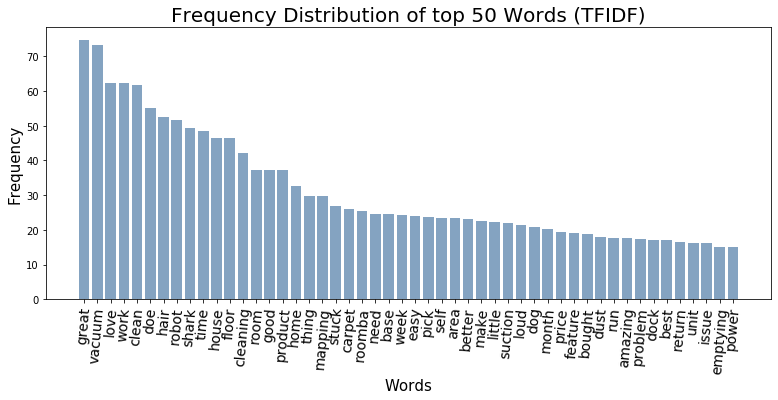

In [67]:
sum_words_tf = X_tf.sum(axis=0)
words_freq_tf = [(word, sum_words_tf[0, idx]) for word, idx in tfidf.vocabulary_.items()]
words_freq_tf =sorted(words_freq_tf, key = lambda x: x[1], reverse=True) # list of tuples in order

words_frequency_tf=Convert(words_freq_tf)
top_50_tf=dict(Counter(words_frequency_tf).most_common(50))

plt.figure(figsize=(13,5))
plt.title('Frequency Distribution of top 50 Words (TFIDF)',size=20)
plt.ylabel('Frequency',size=15)
plt.xlabel('Words',size=15)
plt.xticks(rotation=85,size=14)
plt.bar(top_50_tf.keys(),top_50_tf.values(),color=(0.2, 0.4, 0.6, 0.6))
plt.gca().xaxis.grid(False)
plt.show()

<font color=purple size=4> Above is the word-frequency chart based on TF-IDF. As we can see that 2 of top 3 words are very positive words as "great" and "love".   
"Clean" was also been mentioned many times which means robots are really doing a great job! It is interesting to see that "roomba"'s also showing up in this list. As iRobot is one of strong competitors for SharkNinja, it makes sense that customers are making comparison between their products.</font>

<font color=purple size=4> Now let's keep going on "Topic Modeling" journey that I want to see what will happen if we change the topic numbers. Are we able to tell a topic theme based on the results? </font>

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
#x_train, x_test, y_train, y_test = train_test_split(tfidf, review_all['Cleaned_Comment'], test_size=0.2)

In [93]:
def display_topics(model, feature_names, num_top_words):
  topics=dict()
  for topic_idx, topic in enumerate(model.components_):
    topics[topic_idx]=" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]])
  return topics

In [120]:
num_top_words = 50
num_topics=6

X_tf_feature_names =tfidf.get_feature_names()
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(X_tf)
topic_tf=display_topics(lda, X_tf_feature_names, num_top_words)
X_tf_topics = lda.transform(X_tf)

In [121]:
topic_names=['Topic '+str(i) for i in range(0,6)]

df_topics=pd.DataFrame.from_records(X_tf_topics)#DataFrame.from_records接受字典列表并创建一个数据框，该字典的每个键都有一列。
df_topics.columns=topic_names
topics=pd.concat([review_clean,df_topics],axis=1)
topics.head(2)

Cleaned_Comment  \
0  roomba bought shark mother house hoping perform good roomba half price roomba thought worth trying well shark basically poor roomba look even make little jingle roomba self disposing empty term pe...   
1  cheap random motion vacuum robot worked pretty well decided upgrade shark unit added mapping functionality auto empty way cheap brand unit thing extremely loud want algorithm us seem half baked ge...   

   attitude  \
0  Negative   
1  Negative   

    Topic 0  \
0  0.024393   
1  0.027567   

    Topic 1  \
0  0.024417   
1  0.027567   

    Topic 2  \
0  0.024714   
1  0.027661   

    Topic 3  \
0  0.532875   
1  0.861669   

    Topic 4  \
0  0.369081   
1  0.027904   

    Topic 5  
0  0.024521  
1  0.027632

In [122]:
topics.loc[10]

Cleaned_Comment    always wanted smart robot vacuum price always scared shark offer affordable price decided give shot pet house found useful clean hair work great hard floor carpet issue transitioning controlled mo...
attitude                                                                                                                                                                                                          Positive
Topic 0                                                                                                                                                                                                          0.0246969
Topic 1                                                                                                                                                                                                          0.0246922
Topic 2                                                                                                                     

<font color=purple size=4> Above, take 11th review as an example, there is 87.5% that it will drop into the 5th topic.</font>

In [123]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [124]:
n_top_words = 10
print("\nTopics in LDA model: ")
tf_feature_names = tfidf.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:stuck christmas foot finish sensor used station getting base thing

Topic #1:support suck called tried connect time help wifi hair room

Topic #2:connect remote perfect compared software robot debris unit properly start

Topic #3:love clean vacuum room robot doe house time shark cleaning

Topic #4:great work vacuum hair product love doe floor shark easy

Topic #5:item review pattern error time phone life tried returned doe


<font color=purple size=4> Above are the top words in 6 topics. Let's take a guess on the themes of these topics based on important workds.

Topic0: With "stuck" as the top 1 word, I assume this topic contains mostly netative reviews and basically blaming on because of "sensor" and other problems showing up, the robots are always get "stuck" and not able to "finish" the whole cleaning process.  





Topic1: Suck has the big power and wifi got connected pretty well.  

Topic2: Because of good connection between the mobile and robot, remote control works smoothly.  

Topic3: Just love this!   

Topic4: It works great just love it! I guess this one is similar to the last topic.  

Topic5: This topic contains few negative words like "error" and "returned" which may be saying that they have to return the robot because of many errors.</font>   

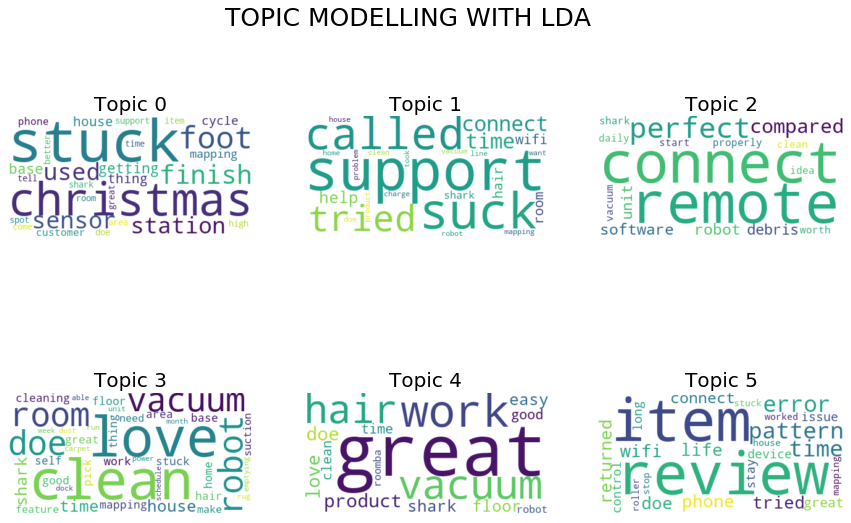

In [125]:
# word cloud to represent top words in each news topic
f,axes=plt.subplots(2,3,sharex=False,sharey=False,figsize=(45, 8))
ax = axes.ravel()
for i in range(0,6):
  wordcloud = WordCloud(background_color='white',min_font_size=12).generate(topic_tf[i])
  ax[i].imshow(wordcloud, interpolation="bilinear")
  ax[i].axis("off")
  ax[i].set_title('Topic '+str(i),size=20)
  ax[i].margins(x=0, y=0)
f.set_figheight(9)
f.set_figwidth(15)
f.suptitle('TOPIC MODELLING WITH LDA ',size=25)
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.2)
plt.show()

Reduce number to 5

In [126]:
num_top_words = 50
num_topics=5
X_tf_feature_names =tfidf.get_feature_names()
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(X_tf)#X_bow_1
topic_tf=display_topics(lda, X_tf_feature_names, num_top_words)

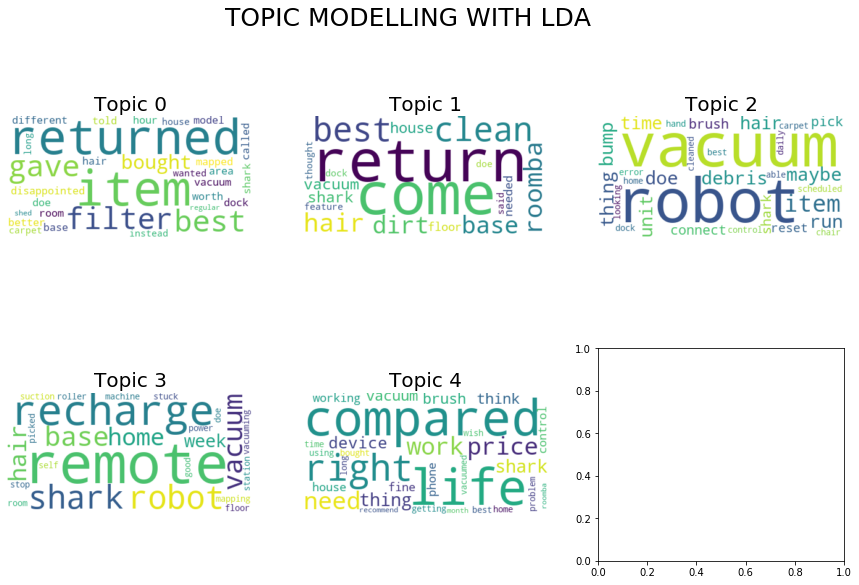

In [137]:
f,axes=plt.subplots(2,3,sharex=False,sharey=False,figsize=(45, 8))
ax = axes.ravel()
for i in range(0,5):
  wordcloud = WordCloud(background_color='white',min_font_size=12).generate(topic_tf[i])
  ax[i].imshow(wordcloud, interpolation="bilinear")
  ax[i].axis("off")
  ax[i].set_title('Topic '+str(i),size=20)
  ax[i].margins(x=0, y=0)
f.set_figheight(9)
f.set_figwidth(15)
f.suptitle('TOPIC MODELLING WITH LDA ',size=25)
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.2)
plt.show()

Expand topics number to 10

In [128]:
num_top_words = 30
num_topics=10
X_tf_feature_names =tfidf.get_feature_names()
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(X_tf)#X_bow_1
topic_tf=display_topics(lda, X_tf_feature_names, num_top_words)

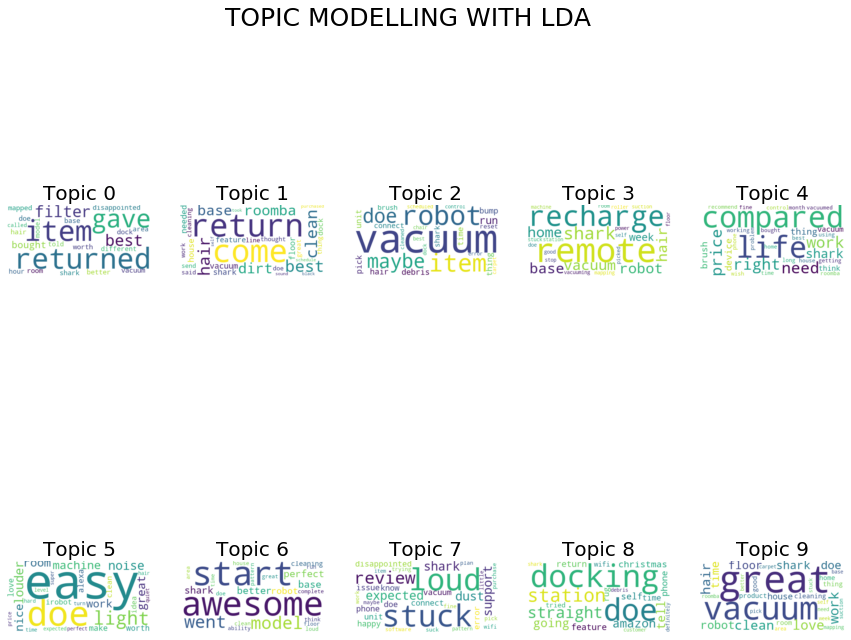

In [141]:
f,axes=plt.subplots(2,5,sharex=False,sharey=False,figsize=(45, 6))
ax = axes.ravel()
for i in range(0,10):
  wordcloud = WordCloud(background_color='white',min_font_size=12).generate(topic_tf[i])
  ax[i].imshow(wordcloud, interpolation="bilinear")
  ax[i].axis("off")
  ax[i].set_title('Topic '+str(i),size=20)
  ax[i].margins(x=0, y=0)
f.set_figheight(12)
f.set_figwidth(15)
f.suptitle('TOPIC MODELLING WITH LDA ',size=25)
#plt.subplots_adjust(hspace=0.3)
#plt.subplots_adjust(wspace=0.2)
plt.show()

<font color=purple size=4>I also changed the topic numbers to 5 and 10 to check the changes. The visualization result is shown as above.</font>  

# 5. Machine Learning Model Prediction 

<font color=purple size=4>I want to be able to predict the emotions a customer towards the robot based on their reviews.  
I only chose Logistic Regression and Decision Tree models for this prediction since I've been explored a lot of details about different machine learning models in other projects and the whole point of this project is NLP. </font>  

In [269]:
tf1=tf.drop(['Cleaned_Comment'], axis=1)

In [270]:
tf1['Attitude'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

<font color=purple size=4>The target variable is "Attitude" obviously. To transfer them into numerical data, I set 0,1,2 for three attitudes correspondingly. </font>  

In [272]:
tf1['Attitude'].replace('Negative',0,inplace=True)
tf1['Attitude'].replace('Neutral',1,inplace=True)
tf1['Attitude'].replace('Positive',2,inplace=True)
tf1.head()

Attitude  \
0         0   
1         0   
2         0   
3         0   
4         0   

    ability  \
0  0.000000   
1  0.000000   
2  0.074237   
3  0.000000   
4  0.133476   

       able  \
0  0.000000   
1  0.000000   
2  0.119778   
3  0.000000   
4  0.000000   

   absolutely  \
0         0.0   
1         0.0   
2         0.0   
3         0.0   
4         0.0   

   actually  \
0   0.00000   
1   0.00000   
2   0.07044   
3   0.00000   
4   0.00000   

   alexa  amazing  \
0    0.0      0.0   
1    0.0      0.0   
2    0.0      0.0   
3    0.0      0.0   
4    0.0      0.0   

    amazon  \
0  0.00000   
1  0.00000   
2  0.07619   
3  0.00000   
4  0.00000   

       area  away  \
0  0.000000   0.0   
1  0.000000   0.0   
2  0.152500   0.0   
3  0.000000   0.0   
4  0.091397   0.0   

   ...    wanted  \
0  ...  0.107442   
1  ...  0.000000   
2  ...  0.000000   
3  ...  0.090691   
4  ...  0.000000   

       week  \
0  0.078375   
1  0.000000   
2  0.000000   
3  0.000000   
4  0.000000   

       went  \
0  0.000000   
1  0.000000   
2  0.000000   
3  0.000000   
4  0.128438   

       wifi  wish  \
0  0.000000   0.0   
1  0.000000   0.0   
2  0.000000   0.0   
3  0.000000   0.0   
4  0.131353   0.0   

       work  \
0  0.000000   
1  0.117391   
2  0.148309   
3  0.000000   
4  0.000000   

     worked  \
0  0.000000   
1  0.221515   
2  0.000000   
3  0.000000   
4  0.000000   

    working  \
0  0.000000   
1  0.000000   
2  0.000000   
3  0.083643   
4  0.000000   

      worth  \
0  0.096401   
1  0.000000   
2  0.000000   
3  0.000000   
4  0.000000   

       year  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.086644  
4  0.351408  

[5 rows x 201 columns]

In [321]:
x_train, x_test, y_train, y_test = train_test_split(tf1, tf1['Attitude'], test_size=0.3)

In [322]:
x_train=x_train.drop(['Attitude'], axis=1)
x_test=x_test.drop(['Attitude'], axis=1)

In [323]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(707, 200)
(303, 200)
(707,)
(303,)


In [318]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [324]:
def model_prediction(algo):
    model = algo
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    #output = pd.DataFrame({'Item_Identifier':test['Item_Identifier'], 'Outlet_Identifier':test['Outlet_Identifier'], 'Item_Outlet_Sales':y_pred}, columns=['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales'])
    return acc #, output

In [325]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=model_prediction(lr)
lr_acc 

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6468646864686468

In [326]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree_acc = model_prediction(dtree)
dtree_acc 

0.49504950495049505

In [327]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lr, random_state=1).fit(x_test, y_test)#支持向量机
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

<font color=purple size=4> The Logistic Regression model reached a 65% accuracy predicting their attitude toward products. I also print top words those affect the result the most. </font>  

# 6. Automatically Summarize Reviews

<font color=purple size=4> Sometimes customers are super excited that they type a very long review which takes a lot of time to read.  
I think it should be great if we can have a function that could shorten the long review and summarize it by only showing the important words.  
Scroll down to the bottom to see how it works.
</font> 

In [270]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [268]:
import base64
import string
import re
from collections import Counter
from time import time
import heapq
from nltk.corpus import stopwords
import nltk
stopwords = stopwords.words('english')
sns.set_context('notebook')
import spacy

In [269]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp37-none-any.whl size=12019129 sha256=4d91c0a78ed35ef770e85f9b965a6c3cbd62b70c96e83748f327de8801615d8c
  Stored in directory: C:\Users\3BB3~1\AppData\Local\pip\Cache\wheels\48\5c\1c\15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5


In [271]:
def normalize_text(text): # normalize the text by cleaning it and preprocessing it
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>©', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")

In [274]:
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~©'
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return pd.Series(texts)

In [276]:
review_all['Cleaned']=review_all['Review'].apply(normalize_text)
review_all['normalize'] = review_all['Cleaned'].apply(lambda x: cleanup_text(x, False))
review_all

CustomerName  \
0                                                B. Mindful   
1                                               Scott Flack   
2                                                  RDouglas   
3                                                    Wesley   
4                                                   Bill S.   
5                                                James Chen   
6                                                      Rick   
7                                           Amazon Customer   
8                                           Amazon Customer   
9                                            Jason Ransdell   
10                                                     Mick   
11                                            Granny Franny   
12                                                  Lillian   
13                                                   John F   
14                                                 Jeremy M   
15                                                      SOB   
16                                                     jack   
17                                               Anderson’s   
18                                            coleen ferrin   
19                                            Joe Bernicker   
20                                            Jose Oliveira   
21                                          Amazon Customer   
22                                                 UCF10fan   
23                                              Norma Scott   
24                                                 Red Shay   
25                                          yunon zavulonov   
26                                          Amanda Victoria   
27                                                   Ryan_L   
28                                                  Bill Xu   
29                                         Charles K. Walls   
30                                                    kavin   
31                                                   Chip W   
32                                                       JK   
33                                             Brad Goodall   
34                                           Shareef Yousef   
35                                          Amazon Customer   
36                                          Abraham Cornejo   
37                                               jeffery d.   
38                                                    Shone   
39                                                 Cathy M.   
40                                                  Paulnet   
41                                             AvatarJennie   
42                                                    Wendy   
43                                            PB and J Time   
44                                               Gavin Hill   
45                                               Jacqueline   
46                                                L&SHodges   
47                                            Misty shiplet   
48                                          Amazon Customer   
49                                                      Wes   
50                                                 B. Brown   
51                                          Amazon Customer   
52                                          Amazon Customer   
53                                                   Joe T.   
54                                                 SChriste   
55                                                  L-Train   
56                                           VaderIncarnate   
57                                                   Sandra   
58                                                   Pete C   
59                                                    James   
60                                                     D. L   
61                                                    Jason   
62                                               levi meyer   
63             

In [278]:
print('Before normalizing text-----\n')
print(review_all['Review'][4])
print('\nAfter normalizing text-----\n')
print(review_all['normalize'][4])

Before normalizing text-----

I purchased the Shark IQ to replace a NEATO that finally, after many years and cycles of service, went to that robot vacuum cleaner home in the sky.  The Shark had some big shoes to fill, but I was confident that, with the advertised features, it was well up to the task.  I was, sadly, disappointed.There are two features in a vac that are important to me.  First, and most obviously, it needs to clean well.  I have a black cat that leaves her fur all over the place, and a 14 year old son that's not much better about leaving a various crumbs and etc.  The second feature is that the bot return to its base and resume when needed.  Our house generally will take two cycles to get through because of the layout and size.  Another important aspect for me was the ability to control the bot remotely.  The application and wifi connectivity that came with this particular model fit that bill nicely.  Finally, I needed it to be simple.  In my life, I've learned that if d

In [279]:
# this is function for text summarization
def generate_summary(text_without_removing_dot, cleaned_text):
    sample_text = text_without_removing_dot
    doc = nlp(sample_text)
    sentence_list=[]
    for idx, sentence in enumerate(doc.sents): # we are using spacy for sentence tokenization
        sentence_list.append(re.sub(r'[^\w\s]','',str(sentence)))

    stopwords = nltk.corpus.stopwords.words('english')

    word_frequencies = {}  
    for word in nltk.word_tokenize(cleaned_text):  
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1


    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)


    sentence_scores = {}  
    for sent in sentence_list:  
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 20:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(2, sentence_scores, key=sentence_scores.get)

    summary = ' '.join(summary_sentences)
    print('\nSummarized Comment:\n')
    print(summary)

In [282]:
n=303
print('Original Comment \n')
print(review_all['Review'][n])
generate_summary(review_all['normalize'][n], review_all['Cleaned'][n])

Original Comment 

I bought 2 of your vacuums in 6 weeks and both of them broke and had to be returned. I finally got my money back and boughtanother vacuum.

Summarized Comment:

finally get money back boughtanother vacuum  buy 2 vacuum 6 week break return 


<font color=purple size=4> Change the "n" in last cell to see how it works under different comments.
</font> 